1. Let $b=[x, y]$. From $\big|\big|b\big|\big|_2=1$,

    $$x^2 + y^2 = 1$$

    From $\big|\big|Ab\big|\big|_2=1$,

    $$(3x-y)^2 + x^2 = 1$$

    $$(3x-2y)x=0$$

    Therefore, the solutions are $x=0,\ y=\pm1$ or $x=\pm\dfrac{2}{\sqrt{13}},\ y=\pm\dfrac{3}{\sqrt{13}}$

    See [below](#Plot-norm-2) for the plot.

2. Let $c=[x, y]$. From $\big|\big|c\big|\big|_2=1$,

    $$\max(|x|, |y|) = 1$$

    From $\big|\big|Ac\big|\big|_2=1$,

    $$\max(|3x-y| + |x|) = 1$$

    At the crossing, if $1 = |x| \geqslant |y|$, then $1 = |x| \geqslant |3x - y|$, which is not possible.
    If $1 = |y| \geqslant |x|$, then $1 = |3x - y| \geqslant |x|$, $x=0$ or $x=\dfrac{2y}{3}$

    Therefore, the solutions are $x=0,\ y=\pm1$ or $x=\pm\dfrac{2}{3},\ y=\pm1$

    See [below](#Plot-norm-$\infty$) for the plot.

3. The code to find the roots and the results are [here](#Find-the-root)

    The plot is [below the result](#Plot-norm-4)

4. The solutions are all on the lines, $x=0$ and $x=\dfrac{2y}{3}$ since $\{\big|r_x\big|, \big|r_y\big|\} = \{\big|(Ar)_x\big|, \big|(Ar)_y\big|\}$ on these two lines.

In [1]:
using PyPlot
using ForwardDiff

In [2]:
function gen_eqlen{T0}(mat::AbstractMatrix{T0}, normf, normv=1)
    len = 10000
    T = typeof(float(zero(T0)))
    if size(mat) != (2, 2)
        throw(ArgumentError("Transformation must be a 2x2 matrix"))
    end
    θs = linspace(T(0), T(2π), len)
    xs = Vector{T}(len)
    ys = Vector{T}(len)
    @inbounds for i in 1:len
        # Find the right coordinate in each direction
        # This rely on the norm function to scale linearly when both
        # x and y are scaled by the same factor
        θ = θs[i]
        x0 = cos(θ)
        y0 = sin(θ)
        x1 = mat[1, 1] * x0 + mat[1, 2] * y0
        y1 = mat[2, 1] * x0 + mat[2, 2] * y0
        scale = normv / normf(x1, y1)
        x = x0 * scale
        y = y0 * scale
        xs[i] = x
        ys[i] = y
    end
    xs, ys
end

gen_eqlen (generic function with 2 methods)

In [3]:
# We don't need these to avoid the anonymous function overhead anymore once
# Jeff's JuliaLang/julia#13412 is merged ;-p

immutable Norm{N}
end
# This is not the best algorithm to handle overflow/underflow but is good enough for
# this problem (and I'm too lazy to find/implement the right function.....)
call{N}(::Norm{N}, x, y) = (abs(x)^N + abs(y)^N)^(1 / N)

immutable NormInf
end
# This is not the best algorithm to handle overflow/underflow but is good enough for
# this problem (and I'm too lazy to find/implement the right function.....)
call(::NormInf, x, y) = max(abs(x), abs(y))

call (generic function with 2089 methods)

In [4]:
const I2 = [1 0
             0 1]
const A = [3 -1
           1 0]
xI2, yI2 = gen_eqlen(I2, Norm{2}())
xA2, yA2 = gen_eqlen(A, Norm{2}())

xIinf, yIinf = gen_eqlen(I2, NormInf())
xAinf, yAinf = gen_eqlen(A, NormInf());

#### Plot norm-2

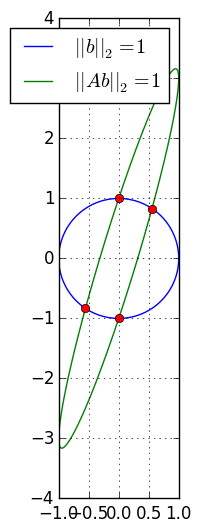

In [5]:
plot(xI2, yI2, label="\$||b||_2=1\$")
plot(xA2, yA2, label="\$||Ab||_2=1\$")
gca()[:set_aspect]("equal")
plot(0, 1, "ro")
plot(0, -1, "ro")
plot(2 / sqrt(13), 3 / sqrt(13), "ro")
plot(-2 / sqrt(13), -3 / sqrt(13), "ro")
legend()
grid()

#### Plot norm-$\infty$

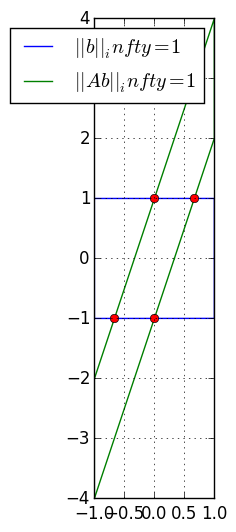

In [6]:
plot(xIinf, yIinf, label="\$||b||_\infty=1\$")
plot(xAinf, yAinf, label="\$||Ab||_\infty=1\$")
gca()[:set_aspect]("equal")
plot(0, 1, "ro")
plot(0, -1, "ro")
plot(2 / 3, 1, "ro")
plot(-2 / 3, -1, "ro")
legend()
grid()

#### Find the root

In [7]:
function solve_multi(f, init, goal=1e-6)
    x = init
    while true
        δ = f(x)
        if norm(δ) < goal
            return x
        end
        x = x - jacobian(f, x) \ δ
    end
end

solve_multi (generic function with 2 methods)

In [8]:
f4(d) = [norm(d, 4) - 1, norm(A * d, 4) - 1]

f4 (generic function with 1 method)

In [9]:
r1 = solve_multi(f4, [0., 1.])

2-element Array{Float64,1}:
 0.0
 1.0

In [10]:
r2 = solve_multi(f4, [0., -1.])

2-element Array{Float64,1}:
  0.0
 -1.0

In [11]:
r3 = solve_multi(f4, [2 / 3, 1.])

2-element Array{Float64,1}:
 0.63729 
 0.955935

In [12]:
r4 = solve_multi(f4, [-2 / 3, -1.])

2-element Array{Float64,1}:
 -0.63729 
 -0.955935

In [13]:
xI4, yI4 = gen_eqlen(I2, Norm{4}())
xA4, yA4 = gen_eqlen(A, Norm{4}())

([0.332312,0.332381,0.33245,0.332519,0.332588,0.332657,0.332725,0.332794,0.332863,0.332932  …  0.331695,0.331763,0.331832,0.3319,0.331969,0.332038,0.332106,0.332175,0.332244,0.332312],[0.0,0.000208862,0.000417811,0.000626847,0.000835969,0.00104518,0.00125448,0.00146386,0.00167334,0.0018829  …  -0.0018759,-0.0016678,-0.00145963,-0.00125137,-0.00104302,-0.000834587,-0.000626069,-0.000417465,-0.000208776,-8.13931e-17])

#### Plot norm-4

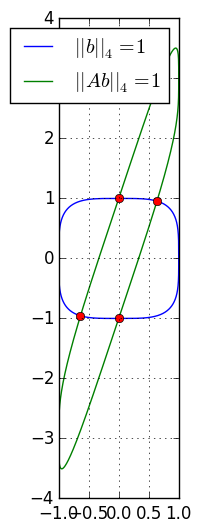

In [14]:
plot(xI4, yI4, label="\$||b||_4=1\$")
plot(xA4, yA4, label="\$||Ab||_4=1\$")
gca()[:set_aspect]("equal")
plot(r1..., "ro")
plot(r2..., "ro")
plot(r3..., "ro")
plot(r4..., "ro")
legend()
grid()